In [2]:
import pandas as pd
import numpy as np
from autogluon import *
from autogluon.tabular import TabularDataset, TabularPredictor
import sys
from autogluon.common.utils.utils import setup_outputdir
sys.path.append('MultilabelPredictor.py')
import MultilabelPredictor

Splitting data into Training and Testing

In [3]:
df = pd.read_csv("formattedData.csv", encoding="ISO-8859-1")
print(df)
df=TabularDataset(df.copy())
df = df.iloc[:, 1:].reset_index(drop=True)

def to_float_or_original(value):
    try:
        return float(value)
    except ValueError:
        return value
df = df.applymap(to_float_or_original)

columns = ['H', 'L1', 'L2', 'L3', 'L4', 'L5', 'L7', 'L8', 'A2', 'D', 'T', 'D2', 'T2', 'D3', 'CrossMat', 'FrameMat', 'Mass1', 'Minimum Factor of Safety1', 'Center_Y', 'Center_Z', 'Leg_Displacement', 'Handle_X','Handle_Y', 'Handle_Z']
df.columns = columns

percentage_for_test = 0.1


num_rows_for_test = int(len(df) * percentage_for_test)
print(num_rows_for_test)
testDf = df.sample(n=num_rows_for_test, random_state=42)  # fixed random_state for reproducibility

df = df.drop(testDf.index)

      Unnamed: 0         H        L1        L2        L3        L4        L5  \
0              0  35.64063  15.67188  18.59375   2.71875   5.96875  17.43750   
1              1  37.96094  14.33594  25.85938   6.54688  12.60938  21.34375   
2              2  34.86719  17.99219  26.79688   9.35938   9.79688  18.21875   
3              3  34.62109  21.75391  23.39844   5.88281   6.55469  17.04688   
4              4  35.81641  21.68359  24.57031   2.67969   7.57031  20.32813   
...          ...       ...       ...       ...       ...       ...       ...   
5001        5394  31.33014  20.72284  26.22009   4.77625   8.79651  11.19116   
5002        5395  35.47858  14.60565  30.20447   9.69812   7.46838  12.90991   
5003        5396  39.41600  16.29315  32.07947   1.57312  10.59338  21.65991   
5004        5397  35.33795  20.93378   9.11072   5.47937  10.43713  26.34741   
5005        5398  36.18170  17.84003  17.54822  10.16687   9.49963  28.22241   

            L7        L8         A2  ..

Saving the training and testing data as a checkpoint

In [4]:
df.to_csv("trainingData.csv")
testDf.to_csv("testingData.csv")
print(df)

             H        L1        L2        L3        L4        L5        L7  \
0     35.64063  15.67188  18.59375   2.71875   5.96875  17.43750  11.21875   
1     37.96094  14.33594  25.85938   6.54688  12.60938  21.34375  18.67188   
2     34.86719  17.99219  26.79688   9.35938   9.79688  18.21875  20.35938   
3     34.62109  21.75391  23.39844   5.88281   6.55469  17.04688  23.52344   
4     35.81641  21.68359  24.57031   2.67969   7.57031  20.32813  21.97656   
...        ...       ...       ...       ...       ...       ...       ...   
5000  31.89264  14.53534   5.59509   2.90125   9.42151   9.94116  21.84802   
5001  31.33014  20.72284  26.22009   4.77625   8.79651  11.19116  18.47302   
5003  39.41600  16.29315  32.07947   1.57312  10.59338  21.65991  14.11365   
5004  35.33795  20.93378   9.11072   5.47937  10.43713  26.34741   9.89490   
5005  36.18170  17.84003  17.54822  10.16687   9.49963  28.22241  14.95740   

            L8         A2        D  ...  \
0      8.90625  103.

Fitting the model

In [5]:
labels = ['Mass1', 'Minimum Factor of Safety1', 'Center_Y', 'Center_Z', 'Leg_Displacement', 'Handle_X','Handle_Y', 'Handle_Z']
problem_types = ['regression', 'regression', 'regression', 'regression', 'regression', 'regression', 'regression', 'regression']
save_path = 'Predicted'

df = pd.read_csv("trainingData.csv", index_col=False)
df = df.iloc[:, 1:]
print(df)

# multi_predictor = MultilabelPredictor.MultilabelPredictor(labels=labels, problem_types=problem_types, path=save_path)
# multi_predictor.fit(df)
# multi_predictor.save()

             H        L1        L2        L3        L4        L5        L7  \
0     35.64063  15.67188  18.59375   2.71875   5.96875  17.43750  11.21875   
1     37.96094  14.33594  25.85938   6.54688  12.60938  21.34375  18.67188   
2     34.86719  17.99219  26.79688   9.35938   9.79688  18.21875  20.35938   
3     34.62109  21.75391  23.39844   5.88281   6.55469  17.04688  23.52344   
4     35.81641  21.68359  24.57031   2.67969   7.57031  20.32813  21.97656   
...        ...       ...       ...       ...       ...       ...       ...   
4501  31.89264  14.53534   5.59509   2.90125   9.42151   9.94116  21.84802   
4502  31.33014  20.72284  26.22009   4.77625   8.79651  11.19116  18.47302   
4503  39.41600  16.29315  32.07947   1.57312  10.59338  21.65991  14.11365   
4504  35.33795  20.93378   9.11072   5.47937  10.43713  26.34741   9.89490   
4505  36.18170  17.84003  17.54822  10.16687   9.49963  28.22241  14.95740   

            L8         A2        D  ...  \
0      8.90625  103.

Loading Predictor from saved file

In [6]:
multi_predictor = MultilabelPredictor.MultilabelPredictor.load("Predicted")

Testing the predictor using Interpolation

In [7]:
aluminum = ' 6061-T6 (SS)@SOLIDWORKS Materials$SOLIDWORKS Materials|6061-T6 (SS)|164$C:/Program Files/SOLIDWORKS Corp/SOLIDWORKS/lang/english/sldmaterials/SOLIDWORKS Materials.sldmat|6061-T6 (SS)|164'
steel = ' AISI 4130 Steel#^# annealed at 865C@SOLIDWORKS Materials$SOLIDWORKS Materials|AISI 4130 Steel#^# annealed at 865C|94$C:/Program Files/SOLIDWORKS Corp/SOLIDWORKS/lang/english/sldmaterials/SOLIDWORKS Materials.sldmat|AISI 4130 Steel#^# annealed at 865C|94',  ' 6061-T6 (SS)@SOLIDWORKS Materials$SOLIDWORKS Materials|6061-T6 (SS)|164$C:/Program Files/SOLIDWORKS Corp/SOLIDWORKS/lang/english/sldmaterials/SOLIDWORKS Materials.sldmat|6061-T6 (SS)|164'
titanium = 'Ti-6Al-4VSolution treated and aged (SS)@SOLIDWORKS Materials$SOLIDWORKS Materials|Ti-6Al-4VSolution treated and aged (SS)|205$C:/Program Files/SOLIDWORKS Corp/SOLIDWORKS/lang/english/sldmaterials/SOLIDWORKS Materials.sldmat|Ti-6Al-4VSolution treated and aged (SS)|205'

columns = ['H', 'L1', 'L2', 'L3', 'L4', 'L5', 'L7', 'L8', 'A2', 'D', 'T', 'D2', 'T2', 'D3', 'CrossMat', 'FrameMat']
predictor_mass = multi_predictor.get_predictor('Mass1')

des1arr = [35, 17.5, 20.0, 6.0, 8.0, 19.0, 16.0, 10.0, 137.5, 0.35, 0.3, 0.35, 0.2, 0.6, ' AISI 4130 Steel#^# annealed at 865C@SOLIDWORKS Materials$SOLIDWORKS Materials|AISI 4130 Steel#^# annealed at 865C|94$C:/Program Files/SOLIDWORKS Corp/SOLIDWORKS/lang/english/sldmaterials/SOLIDWORKS Materials.sldmat|AISI 4130 Steel#^# annealed at 865C|94',  ' 6061-T6 (SS)@SOLIDWORKS Materials$SOLIDWORKS Materials|6061-T6 (SS)|164$C:/Program Files/SOLIDWORKS Corp/SOLIDWORKS/lang/english/sldmaterials/SOLIDWORKS Materials.sldmat|6061-T6 (SS)|164']
des1 = pd.DataFrame(des1arr)
des1 = des1.transpose()
des1.columns = columns
des1Num = predictor_mass.predict(des1).iloc[0]
print("1: " + str(des1Num))

des2arr = [35, 17.5, 20.0, 6.0, 8.0, 19.0, 16.0, 10.0, 137.5, 0.45, 0.3, 0.35, 0.2, 0.6, ' AISI 4130 Steel#^# annealed at 865C@SOLIDWORKS Materials$SOLIDWORKS Materials|AISI 4130 Steel#^# annealed at 865C|94$C:/Program Files/SOLIDWORKS Corp/SOLIDWORKS/lang/english/sldmaterials/SOLIDWORKS Materials.sldmat|AISI 4130 Steel#^# annealed at 865C|94',  ' 6061-T6 (SS)@SOLIDWORKS Materials$SOLIDWORKS Materials|6061-T6 (SS)|164$C:/Program Files/SOLIDWORKS Corp/SOLIDWORKS/lang/english/sldmaterials/SOLIDWORKS Materials.sldmat|6061-T6 (SS)|164']
des2 = pd.DataFrame(des2arr)
des2 = des2.transpose()
des2.columns = columns
des2Num = predictor_mass.predict(des2).iloc[0]
print("2: " + str(des2Num))

des3 = pd.DataFrame(np.concatenate((np.mean([des1arr[:14], des2arr[:14]], axis=0), des1arr[14:]), axis=None).tolist())
des3 = des3.transpose()
des3.columns = columns
des3Num = predictor_mass.predict(des3).iloc[0]
print("Actual: " + str(des3Num))

print("Interpolated: " + str((des1Num + des2Num)/2))

1: 14.683622
2: 16.519222
Actual: 15.726636
Interpolated: 15.601422309875488


Testing the predictor using SHAP

In [8]:
import shap
columns = ['H', 'L1', 'L2', 'L3', 'L4', 'L5', 'L7', 'L8', 'A2', 'D', 'T', 'D2', 'T2', 'D3', 'CrossMat', 'FrameMat']
predictor = multi_predictor.get_predictor("Mass1")
aluminum = ' 6061-T6 (SS)@SOLIDWORKS Materials$SOLIDWORKS Materials|6061-T6 (SS)|164$C:/Program Files/SOLIDWORKS Corp/SOLIDWORKS/lang/english/sldmaterials/SOLIDWORKS Materials.sldmat|6061-T6 (SS)|164'

def prediction(x):
    global predictor
    global aluminum
    x_df = pd.DataFrame(x)
    
    extra_data = pd.DataFrame({'CrossMat': [aluminum], 'FrameMat': [aluminum]})

    combined_df = pd.concat([x_df, extra_data], axis=1)
    
    combined_df.columns = columns
    # Predict using the 'Mass1' predictor
    predictions = predictor.predict(combined_df)
    
    return predictions


f = lambda x: prediction(x)
med = df.iloc[:, :14].median().values.reshape((1,df.iloc[:, :14].shape[1]))

numTests = 1

explainer = shap.Explainer(f, med)
#shap_values = explainer(pd.DataFrame(testDf.iloc[:numTests, :14]))

In [9]:
#shap.plots.waterfall(shap_values[0], max_display=20)

We use testDf to graph the accuracy of the predictor

          Mass1  Minimum Factor of Safety1   Center_Y  Center_Z  \
2778  44.475170                  13.290622  21.894173  0.948637   
3435   7.408432                   0.970396  20.722145  0.858899   
1158  20.398441                  13.682445  23.562288  2.667448   
2337  17.535305                   6.041227  22.880005  0.550302   
4017  24.083220                  20.527374  22.319283  1.155773   
...         ...                        ...        ...       ...   
642    6.978498                  14.245861  18.346796  1.231156   
3603  11.157539                   8.283620  18.063959  0.492702   
1055   9.681819                   7.060850  22.116207  2.866932   
2615  16.865726                   8.983559  21.005655  0.915518   
219    5.547099                   7.069998  19.852995  0.727648   

      Leg_Displacement  Handle_X  Handle_Y  Handle_Z  
2778          0.002707  0.020952  0.002361 -0.000134  
3435          0.016842  0.397769  0.010520 -0.027230  
1158          0.009532  0.0462

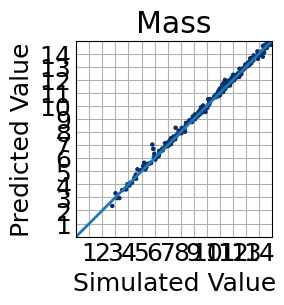

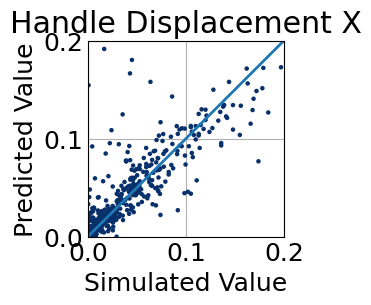

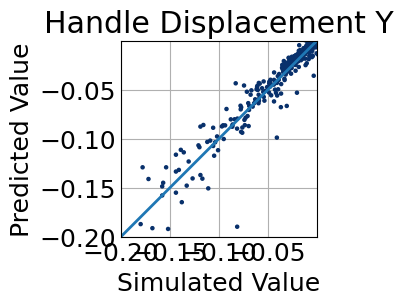

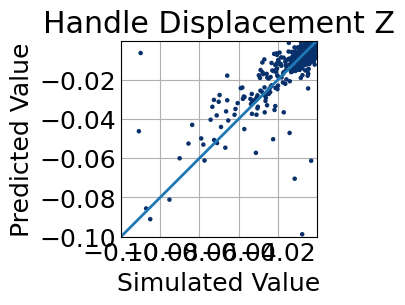

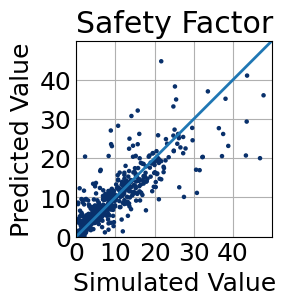

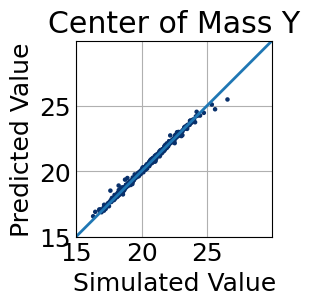

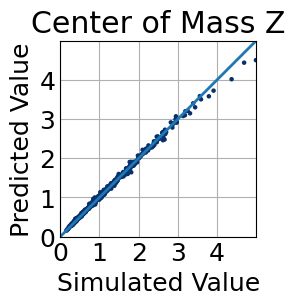

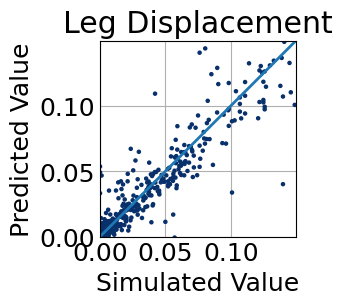

In [69]:
#testDf is the testing dataframe
import matplotlib.pyplot as plt
plt.style.use('_mpl-gallery')
tempTestDf=testDf
predictedVals = multi_predictor.predict(tempTestDf)
print(multi_predictor.evaluate(testDf))
#results = multi_predictor.get_predictor("Mass1").evaluate(testDf)
# results = multi_predictor.get_predictor("Minimum Factor of Safety1").evaluate(testDf)
# results = multi_predictor.get_predictor("Leg_Displacement").evaluate(testDf)
# results = multi_predictor.get_predictor("Handle_X").evaluate(testDf)
# results = multi_predictor.get_predictor("Handle_Y").evaluate(testDf)
# results = multi_predictor.get_predictor("Handle_Z").evaluate(testDf)
# results = multi_predictor.get_predictor("Center_Z").evaluate(testDf)
# results = multi_predictor.get_predictor("Center_Y").evaluate(testDf)

# size and color:
#sizes = np.random.uniform(15, 80, len(x))
colors = [100] * len(predictedVals)
sizes = 5

x = tempTestDf["Mass1"].values
y = predictedVals["Mass1"].values
fig, ax = plt.subplots()
ax.scatter(x, y, s=sizes, c=colors, vmin=0, vmax=100)
ax.set(xlim=(0, 15), xticks=np.arange(1, 15),
       ylim=(0, 15), yticks=np.arange(1, 15))
ax.set_xlabel('Simulated Value')
ax.set_ylabel('Predicted Value')
ax.set_title('Mass')
ax.plot(np.linspace(-10, 100, 100), np.linspace(-10, 100, 100), linewidth=2.0)
plt.show()


x = tempTestDf["Handle_X"].values
y = predictedVals["Handle_X"].values
fig, ax = plt.subplots()
ax.scatter(x, y, s=sizes, c=colors, vmin=0, vmax=100)
ax.set(xlim=(0, 0.15), xticks=np.arange(0, 0.3, 0.1),
       ylim=(0, 0.15), yticks=np.arange(0, 0.3, 0.1))
ax.set_xlabel('Simulated Value')
ax.set_ylabel('Predicted Value')
ax.set_title('Handle Displacement X')
ax.plot(np.linspace(-10, 100, 100), np.linspace(-10, 100, 100), linewidth=2.0)
plt.show()


x = tempTestDf["Handle_Y"].values
y = predictedVals["Handle_Y"].values
fig, ax = plt.subplots()
ax.scatter(x, y, s=sizes, c=colors, vmin=0, vmax=100)
ax.set(xlim=(-0.2, 0), xticks=np.arange(-0.2, 0, 0.05),
       ylim=(-0.2, 0), yticks=np.arange(-0.2, 0, 0.05))
ax.set_xlabel('Simulated Value')
ax.set_ylabel('Predicted Value')
ax.set_title('Handle Displacement Y')
ax.plot(np.linspace(-10, 100, 100), np.linspace(-10, 100, 100), linewidth=2.0)
plt.show()

x = tempTestDf["Handle_Z"].values
y = predictedVals["Handle_Z"].values
fig, ax = plt.subplots()
ax.scatter(x, y, s=sizes, c=colors, vmin=0, vmax=100)
ax.set(xlim=(-0.1, 0), xticks=np.arange(-0.1, 0, 0.02),
       ylim=(-0.1, 0), yticks=np.arange(-0.1, 0, 0.02))
ax.set_xlabel('Simulated Value')
ax.set_ylabel('Predicted Value')
ax.set_title('Handle Displacement Z')
ax.plot(np.linspace(-10, 100, 100), np.linspace(-10, 100, 100), linewidth=2.0)
plt.show()

x = tempTestDf["Minimum Factor of Safety1"].values
y = predictedVals["Minimum Factor of Safety1"].values
fig, ax = plt.subplots()
ax.scatter(x, y, s=sizes, c=colors, vmin=0, vmax=100)
ax.set(xlim=(0, 50), xticks=np.arange(0, 50, 10),
       ylim=(0, 50), yticks=np.arange(0, 50, 10))
ax.set_xlabel('Simulated Value')
ax.set_ylabel('Predicted Value')
ax.set_title('Safety Factor')
ax.plot(np.linspace(-10, 100, 100), np.linspace(-10, 100, 100), linewidth=2.0)
plt.show()

x = tempTestDf["Center_Y"].values
y = predictedVals["Center_Y"].values
fig, ax = plt.subplots()
ax.scatter(x, y, s=sizes, c=colors, vmin=0, vmax=100)
ax.set(xlim=(15, 30), xticks=np.arange(15, 30, 5),
       ylim=(15, 30), yticks=np.arange(15, 30, 5))
ax.set_xlabel('Simulated Value')
ax.set_ylabel('Predicted Value')
ax.set_title('Center of Mass Y')
ax.plot(np.linspace(-10, 100, 100), np.linspace(-10, 100, 100), linewidth=2.0)
plt.show()

x = tempTestDf["Center_Z"].values
y = predictedVals["Center_Z"].values
fig, ax = plt.subplots()
ax.scatter(x, y, s=sizes, c=colors, vmin=0, vmax=100)
ax.set(xlim=(0, 5), xticks=np.arange(0, 5, 1),
       ylim=(0, 5), yticks=np.arange(0, 5, 1))
ax.set_xlabel('Simulated Value')
ax.set_ylabel('Predicted Value')
ax.set_title('Center of Mass Z')
ax.plot(np.linspace(-10, 100, 100), np.linspace(-10, 100, 100), linewidth=2.0)
plt.show()

x = tempTestDf["Leg_Displacement"].values
y = predictedVals["Leg_Displacement"].values
fig, ax = plt.subplots()
ax.scatter(x, y, s=sizes, c=colors, vmin=0, vmax=100)
ax.set(xlim=(0, 0.15), xticks=np.arange(0, 0.15, 0.05),
       ylim=(0, 0.15), yticks=np.arange(0, 0.15, 0.05))
ax.set_xlabel('Simulated Value')
ax.set_ylabel('Predicted Value')
ax.set_title('Leg Displacement')
ax.plot(np.linspace(-10, 100, 100), np.linspace(-10, 100, 100), linewidth=2.0)
plt.show()

Design Space Analysis

In [65]:
import seaborn as sn
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from tqdm.autonotebook import tqdm, trange

x=df.iloc[:,:-8]
y=df.iloc[:,-8:]

original = [7.5, 10.66, 20.62, 0.75, 0.05959, 4.753e-02, -2.777e-02, -7.439e-03]
y.loc[0] = original

reduced=["Handle_Z", "Handle_Y", "Handle_X", "Minimum Factor of Safety1", "Mass1"]
y[reduced] = y[reduced].abs()

reducedRenamed = ["Handle Displacement Z (in)", "Handle Displacement Y (in)", "Handle Displacement X (in)", "Safety Factor", "Model Mass (lbs)"]
y_red=y[reduced]
y_red.columns=reducedRenamed


In [66]:
# #Plot Valid vs invalid
# classes=list(np.zeros(len(y_red.index)))
# for i in range(len(y_red.index)):
#     if y_red["Safety Factor"].iloc[i]>10.5: #I CHECK IF IT'S A GREATER SF THAN ORIGINAL MODEL
#         if y_red["Safety Factor"].iloc[i]>1:#TEMPORARY: CHANGE VALIDITY CONSTRAINT
#             classes[i]="Valid"
#         else:
#             classes[i]="Invalid"
#     else:
#         classes[i]="Invalid"


# selections=["Example Walker 1", "Example Walker 2", "Example Walker 3"]

# classes[y.index.get_loc(3853)]=selections[0]
# classes[y.index.get_loc(2108)]=selections[1]
# classes[y.index.get_loc(857)]=selections[2]

# y_val=y_red.copy()
# y_val.columns = reducedRenamed
# y_val["Legend:"]=classes
# categories = ["Invalid", "Valid"] + selections
# y_val["Legend:"] = pd.Categorical(y_val["Legend:"], categories = categories)
# y_val.sort_values("Legend:", inplace=True)

# s = 100*np.ones(len(y_val))
# s[-3:]=500

#Plot Valid vs invalid
classes=list(np.zeros(len(y_red.index)))
# for i in range(len(y_red.index)):
#     if y_red["Safety Factor"].iloc[i]>10.5: #I CHECK IF IT'S A GREATER SF THAN ORIGINAL MODEL
#         if y_red["Safety Factor"].iloc[i]>1:#TEMPORARY: CHANGE VALIDITY CONSTRAINT
#             classes[i]="Valid"
#         else:
#             classes[i]="Invalid"
#     else:
#         classes[i]="Invalid"
for i in range(len(y_red.index)):
    classes[i] = "Design"

selections=["Original Walker"]

classes[y.index.get_loc(0)]=selections[0]

y_val=y_red.copy()
y_val.columns = reducedRenamed
y_val["Legend:"]=classes
categories = ["Design"] + selections
y_val["Legend:"] = pd.Categorical(y_val["Legend:"], categories = categories)
y_val.sort_values("Legend:", inplace=True)

s = 100*np.ones(len(y_val))
s[-1:]=500

print(y_val)

      Handle Displacement Z (in)  Handle Displacement Y (in)  \
2252                    0.006200                    0.015100   
2994                    0.012500                    0.042400   
2995                    0.001770                    0.006900   
2996                    0.005450                    0.004790   
2997                    0.008390                    0.053600   
...                          ...                         ...   
1500                    0.006030                    0.032100   
1499                    0.002380                    0.000882   
1498                    0.000958                    0.004070   
1504                    0.007220                    0.030500   
0                       0.007439                    0.027770   

      Handle Displacement X (in)  Safety Factor  Model Mass (lbs)  \
2252                    0.002660          12.20             31.49   
2994                    0.082000           8.20             20.76   
2995                    

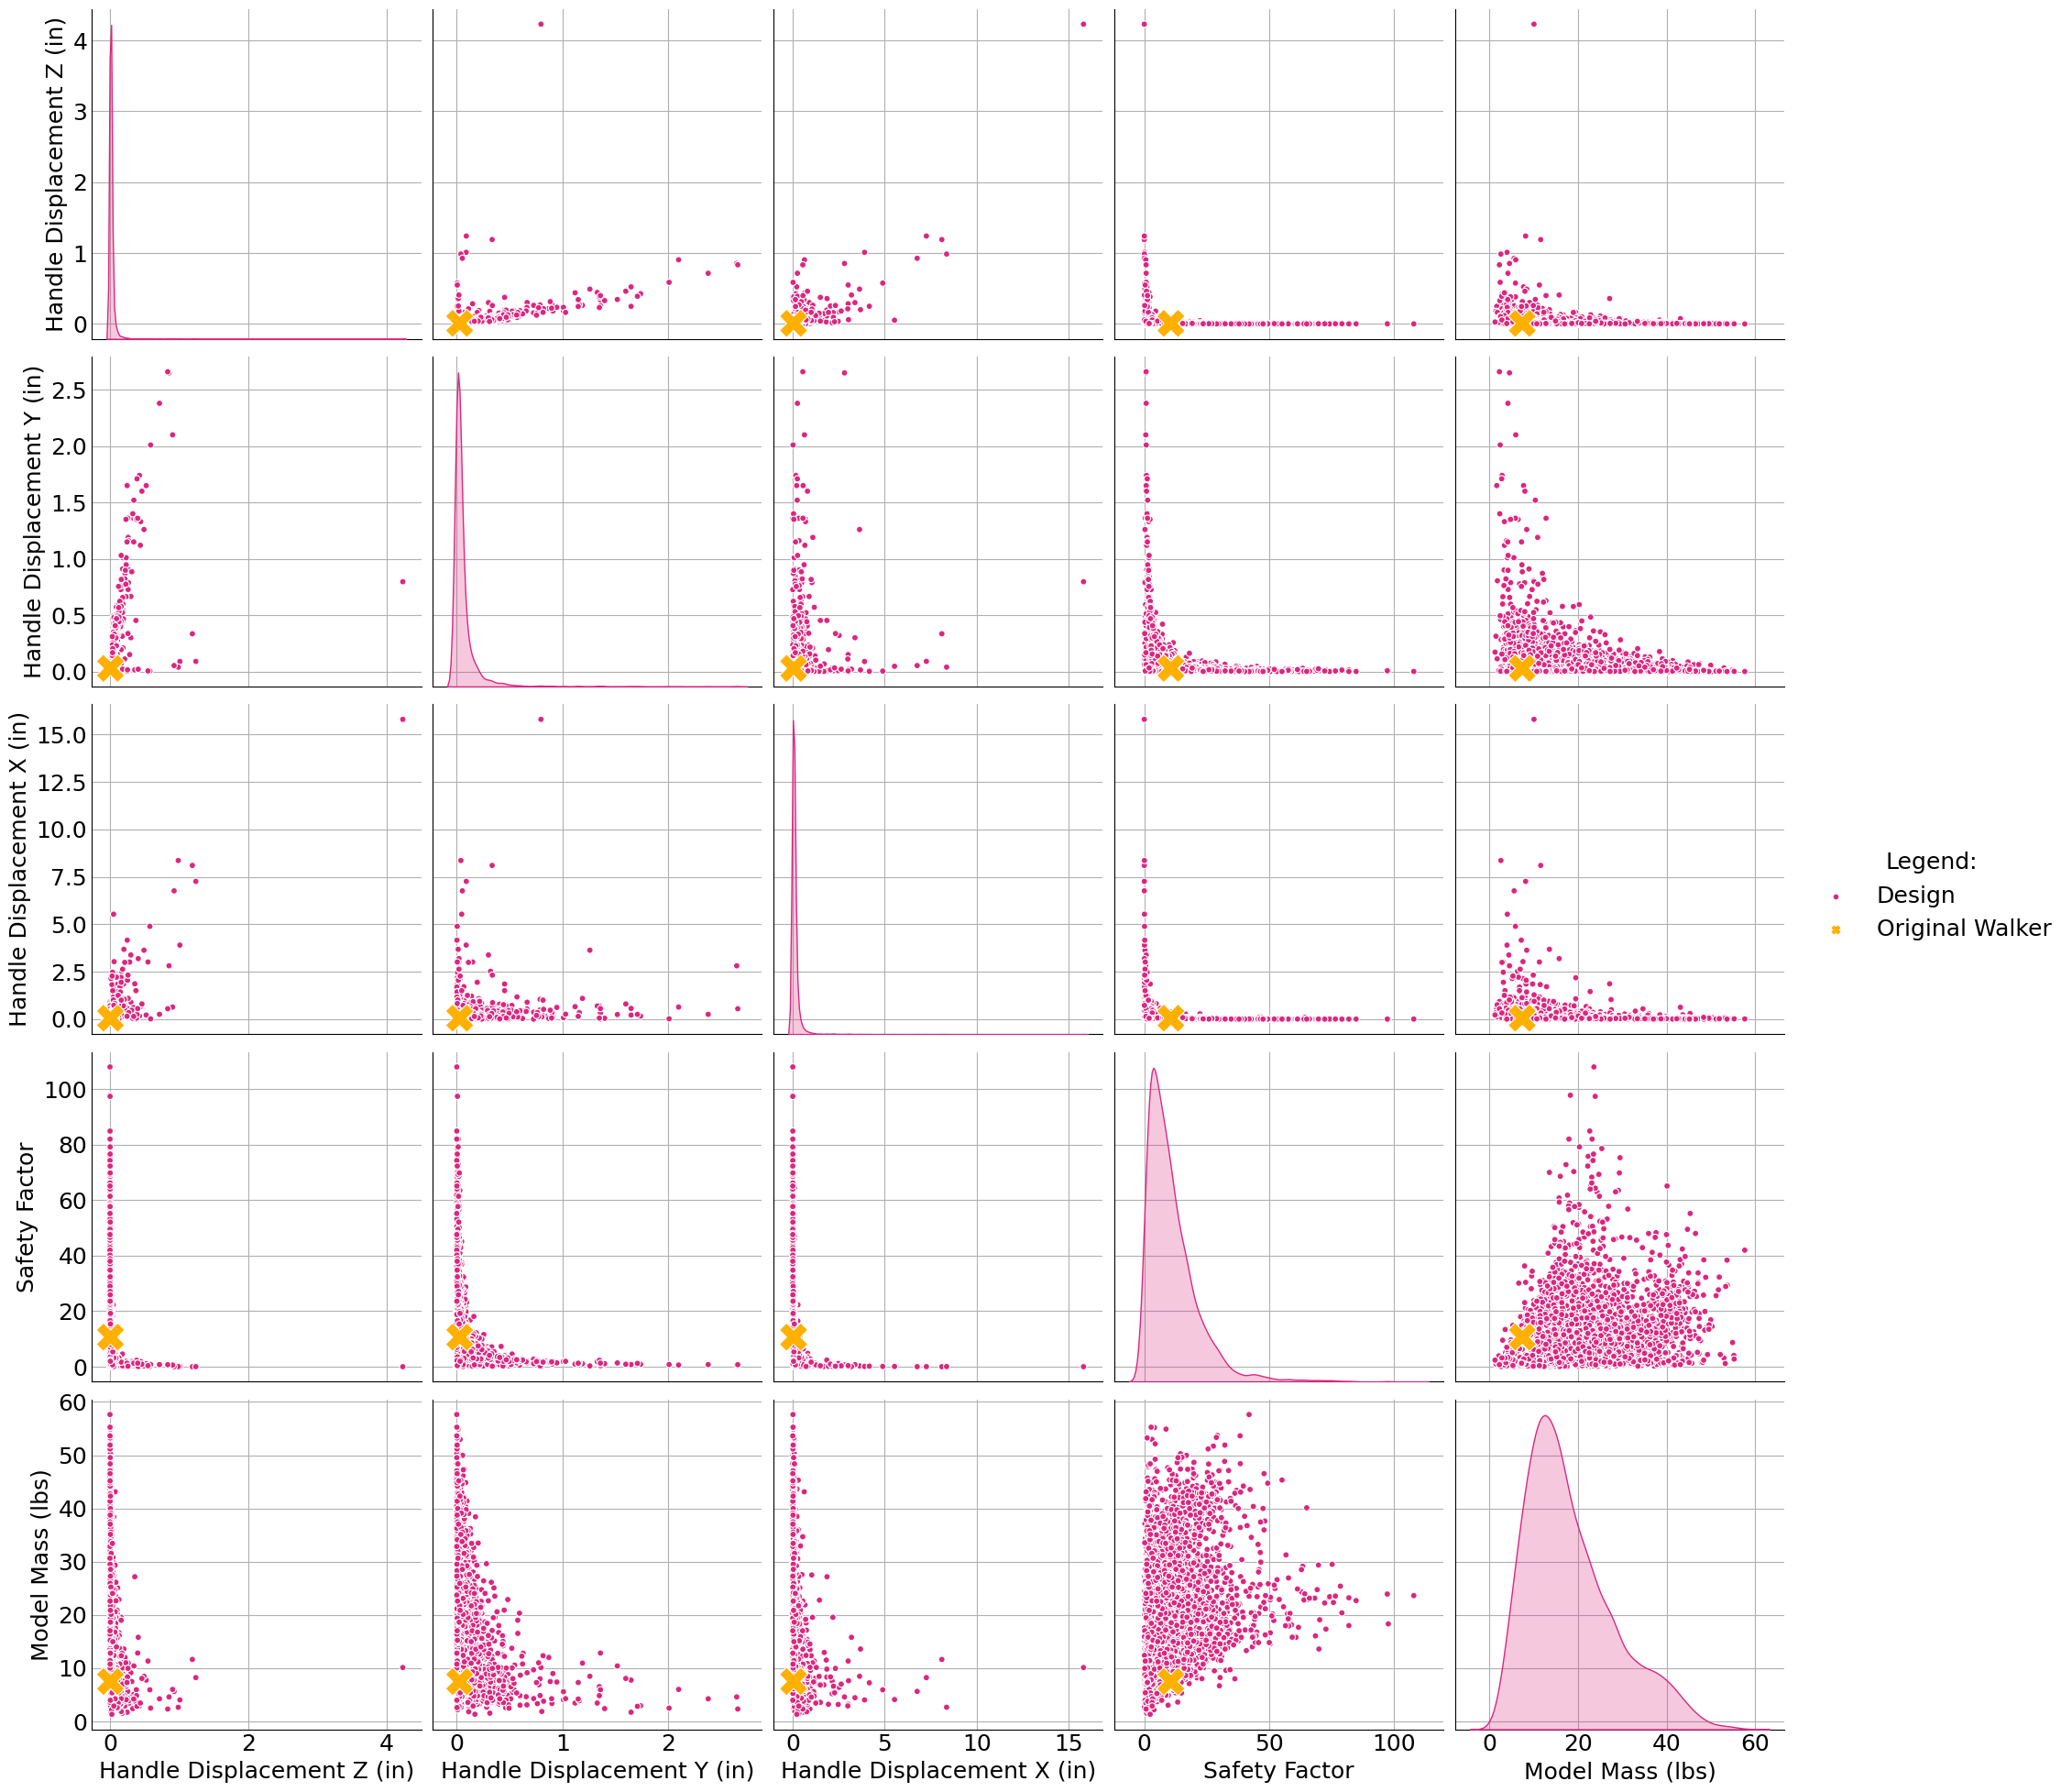

In [67]:
# plt.rcParams.update({'font.size': 18})

# hue_order=categories
# palette=["#DC267F", "#FFB000", "#648FFF", "#785EF0", "#FE6100"]
# markers=[".", ".", "X", "X", "X"]
# g=sns.pairplot(y_val, hue="Legend:", height=4, palette=palette, hue_order=hue_order, markers=markers, plot_kws={"s": s})


plt.rcParams.update({'font.size': 18})

hue_order=categories
palette=["#DC267F", "#FFB000"]
markers=[".", "X"]
g=sns.pairplot(y_val, hue="Legend:", height=4, palette=palette, hue_order=hue_order, markers=markers, plot_kws={"s": s})


Define the theta calculation function:

In [21]:
import math
def calculate_theta_row(row):
    L1 = row['L1'] #inches
    F = 400 * 12 # lbf is pound ft/s^2. *12 is to convert it to lb in/s^2
    m = row['Mass1']  # pounds
    g = 386.089 #in/s^2
    H = row['H'] # inches
    L7 = row['L7'] # inches

    try:
        numerator = m * g * L1
        denominator = 2 * F * math.sqrt(H**2 + ((L1 - L7) / 2)**2)
        first_term = math.asin(numerator / denominator)

        second_term = math.atan((L1 - L7) / (2 * H))

        theta = first_term + second_term

        return math.degrees(theta)
    except ValueError:
        return 90
    
first = pd.DataFrame([[35.25,19,17.5,4.5,19.5,19.5,18.9,10.5,156.25,0.4,0.205,0.45,0.14,0.15,2,2 ,7.78,1,1,1,1,1,1,1]], columns=df.columns)
dfNew = pd.concat([first, df], ignore_index=True)
print(dfNew.apply(calculate_theta_row, axis=1))

0        9.790686
1       12.602303
2       11.615719
3        8.645034
4       15.818594
          ...    
4502     4.185634
4503    17.315365
4504     9.809922
4505    28.490395
4506    14.591248
Length: 4507, dtype: float64


Defining the get Invalid Function

In [23]:
def getInvalid(row):
    valid=True
    if row["H"]<=0:
        valid=False
    if row["L1"]<=0:
        valid=False
    if row["L2"]<=0:
        valid=False
    if row["L3"]<=0:
        valid=False
    if row["L4"]<=0:
        valid=False
    if row["L5"]<=0:
        valid=False
    if row["L7"]<=0:
        valid=False
    if row["L8"]<=0:
        valid=False
    if row["A2"]<=0:
        valid=False
    if row["D"]<=0:
        valid=False
    if row["T"]<=0:
        valid=False
    if row["D2"]<=0:
        valid=False
    if row["T2"]<=0:
        valid=False
    if row["D3"]<=0:
        valid=False
    if (row["L3"] + row["L4"]) >= row["H"]:
        valid=False
    if (row["L2"]) >= (row["H"]-3):
        valid=False
    if (row["L3"]) <= (row["D"] + (2*row["T"]) + 0.5):
        valid=False
    if (row["D"] + (2*row["T"])) > 1:
        valid=False
    if (row["D3"] >= (row["D"] + (2*row["T"]))):
        valid=False
    # #H-L2 in 1 range of (L3 + L4)
    # if ((row["H"]-row["L2"])<(row["L3"]+row["L4"]+row["D3"]+0.1) and ((row["H"]-row["L2"])>(row["L3"]+row["L4"]-row["D3"]-0.1))):
    #     valid=False
    # #H-L2 in 0.9 range of (L4)
    # if ((row["H"]-row["L2"])<(row["L4"]+0.4) and ((row["H"]-row["L2"])>(row["L4"]-0.4))):
    #     valid=False
    if (row["D2"] + (2*row["T2"])) > (row["D"] + (2*row["T"])): 
        valid=False
    return not valid
#print(multi_predictor.predict(df))
columns = ['H', 'L1', 'L2', 'L3', 'L4', 'L5', 'L7', 'L8', 'A2', 'D', 'T', 'D2', 'T2', 'D3', 'CrossMat', 'FrameMat']
vals = [35.25,19,17.5,4.5,19.5,19.5,18.9,10.5,156.25,0.4,0.205,0.45,0.14,0.15,2,2]

data = {col: [val] for col, val in zip(columns, vals)}
np.set_printoptions(suppress=True)

dfInitial = pd.DataFrame(data)
print(np.array([35.25,19,17.5,4.5,19.5,19.5,18.9,10.5,156.25,0.4,0.205,0.45,0.14,0.15,2,2]).reshape(1, 16))
print()
x = df.iloc[:, :16]
y=multi_predictor.predict(x)
x['Mass1'] = y[y.columns[0]]
y['Theta'] = x.apply(calculate_theta_row, axis=1)
y=y.reset_index().iloc[:, 1:]
x=x.reset_index().iloc[:, 1:17].to_numpy()
print(x[0].reshape(1,16))
#print(dfInitial.apply(getInvalid, axis=1))

[[ 35.25   19.     17.5     4.5    19.5    19.5    18.9    10.5   156.25
    0.4     0.205   0.45    0.14    0.15    2.      2.   ]]

[[35.64063 15.67188 18.59375 2.71875 5.96875 17.4375 11.21875 8.90625
  103.51563 0.24688 0.28906 0.22813 0.18594 0.30469
  ' 6061-T6 (SS)@SOLIDWORKS Materials$SOLIDWORKS Materials|6061-T6 (SS)|164$C:/Program Files/SOLIDWORKS Corp/SOLIDWORKS/lang/english/sldmaterials/SOLIDWORKS Materials.sldmat|6061-T6 (SS)|164'
  ' 6061-T6 (SS)@SOLIDWORKS Materials$SOLIDWORKS Materials|6061-T6 (SS)|164$C:/Program Files/SOLIDWORKS Corp/SOLIDWORKS/lang/english/sldmaterials/SOLIDWORKS Materials.sldmat|6061-T6 (SS)|164']]


Defining function to change and restore material strings in dataframe to/from categorical numbers (Needed for old MCD Version)

In [24]:
def changeMat(df):
    mapping_dict = {' Ti-6Al-4VSolution treated and aged (SS)@SOLIDWORKS Materials$SOLIDWORKS Materials|Ti-6Al-4VSolution treated and aged (SS)|205$C:/Program Files/SOLIDWORKS Corp/SOLIDWORKS/lang/english/sldmaterials/SOLIDWORKS Materials.sldmat|Ti-6Al-4VSolution treated and aged (SS)|205': 
                    1,
                    ' 6061-T6 (SS)@SOLIDWORKS Materials$SOLIDWORKS Materials|6061-T6 (SS)|164$C:/Program Files/SOLIDWORKS Corp/SOLIDWORKS/lang/english/sldmaterials/SOLIDWORKS Materials.sldmat|6061-T6 (SS)|164':
                    2,
                    ' AISI 4130 Steel#^# annealed at 865C@SOLIDWORKS Materials$SOLIDWORKS Materials|AISI 4130 Steel#^# annealed at 865C|94$C:/Program Files/SOLIDWORKS Corp/SOLIDWORKS/lang/english/sldmaterials/SOLIDWORKS Materials.sldmat|AISI 4130 Steel#^# annealed at 865C|94':
                    3}
    df['FrameMat'] = df['FrameMat'].replace(mapping_dict)
    df['CrossMat'] = df['CrossMat'].replace(mapping_dict)
def restoreMat(df):
    mapping_dict = {1: ' Ti-6Al-4VSolution treated and aged (SS)@SOLIDWORKS Materials$SOLIDWORKS Materials|Ti-6Al-4VSolution treated and aged (SS)|205$C:/Program Files/SOLIDWORKS Corp/SOLIDWORKS/lang/english/sldmaterials/SOLIDWORKS Materials.sldmat|Ti-6Al-4VSolution treated and aged (SS)|205',
                    2: ' 6061-T6 (SS)@SOLIDWORKS Materials$SOLIDWORKS Materials|6061-T6 (SS)|164$C:/Program Files/SOLIDWORKS Corp/SOLIDWORKS/lang/english/sldmaterials/SOLIDWORKS Materials.sldmat|6061-T6 (SS)|164',
                    3: ' AISI 4130 Steel#^# annealed at 865C@SOLIDWORKS Materials$SOLIDWORKS Materials|AISI 4130 Steel#^# annealed at 865C|94$C:/Program Files/SOLIDWORKS Corp/SOLIDWORKS/lang/english/sldmaterials/SOLIDWORKS Materials.sldmat|AISI 4130 Steel#^# annealed at 865C|94'}
    df['FrameMat'] = df['FrameMat'].replace(mapping_dict)
    df['CrossMat'] = df['CrossMat'].replace(mapping_dict)

MCD Optimization

In [25]:
import random
from pymoo.core.variable import Real
from pymoo.core.variable import Choice
import numpy as np
from decode_mcd import DesignTargets, DataPackage, MultiObjectiveProblem, CounterfactualsGenerator, ContinuousTarget

changeMat(df)
x = df.iloc[:, :16]
first = pd.DataFrame([[35.25,19,17.5,4.5,19.5,19.5,18.9,10.5,156.25,0.4,0.205,0.45,0.14,0.15,2,2]], columns=x.columns)
x = pd.concat([first, x], ignore_index=True)

y=multi_predictor.predict(x)
x['Mass1'] = y[y.columns[0]]
y['Theta'] = x.apply(calculate_theta_row, axis=1)
y=y.reset_index().iloc[:, 1:]
x=x.reset_index().iloc[:, 1:17].to_numpy()
columns = ['H', 'L1', 'L2', 'L3', 'L4', 'L5', 'L7', 'L8', 'A2', 'D', 'T', 'D2', 'T2', 'D3', 'CrossMat', 'FrameMat']
#print(y)

def predict(_x): #Replace with autogluon Predict function #
    #_x: 10 by 16 array (initially dataframe, )
    #return a 10 by 8 array
    xDf = _x.copy()
    xDf.columns = columns
    restoreMat(xDf)
    xDf = multi_predictor.predict(xDf)
    tempx = _x.copy()
    tempx.columns = columns
    restoreMat(tempx)
    tempx['Mass1'] = xDf['Mass1']
    xDf['Theta'] = tempx.apply(calculate_theta_row, axis=1)
    return xDf.to_numpy()

data_package = DataPackage(features_dataset=x, #features dataset: parameters/designs without performance values
    predictions_dataset=y, #Just performance values
    #query_x=np.array([35.25,19,17.5,4.5,19.5,19.5,18.9,10.5,156.25,0.4,0.205,0.45,0.14,0.15,2,2]).reshape(1, 16), #starting design (original design)
    query_x=x[0].reshape(1, 16),
    design_targets=DesignTargets([
        ContinuousTarget(label="Mass1", #Continuous Target for each performance value (8)
                        lower_bound=0,#Upper bounds/Lower bounds can be infinity (Bounds for performance values)
                        upper_bound=6),
        
        ContinuousTarget(label="Handle_X",
                         lower_bound=-1,
                         upper_bound=1),

        ContinuousTarget(label="Handle_Y",
                         lower_bound=-0.75,
                         upper_bound=0),

        ContinuousTarget(label="Handle_Z",
                         lower_bound=-0.2,
                         upper_bound=0.2),

        ContinuousTarget(label="Minimum Factor of Safety1",
                         lower_bound=9.3,
                         upper_bound=10000),

        ContinuousTarget(label="Center_Y",
                         lower_bound=0,
                         upper_bound=29),

        ContinuousTarget(label="Center_Z",
                         lower_bound=0,
                         upper_bound=5),
        
        ContinuousTarget(label="Leg_Displacement",
                         lower_bound=0,
                         upper_bound=20),

        ContinuousTarget(label="Theta",
                         lower_bound=12,
                         upper_bound=100)
        ]),
        datatypes=[
            Real(bounds=(31, 40)), #H
            Real(bounds=(13, 22)), #L1
            Real(bounds=(5, 35)), #L2
            Real(bounds=(1, 11)), #L3
            Real(bounds=(3, 13)), #L4
            Real(bounds=(12.5, 20)), #L5 Used to be 9, 29
            Real(bounds=(17.5, 20.5)), #L7
            Real(bounds=(7, 15)), #L8
            Real(bounds=(100, 175)), #A2
            Real(bounds=(0.05, 0.65)), #D
            Real(bounds=(0.05, 0.35)), #T
            Real(bounds=(0.05, 0.65)), #D2
            Real(bounds=(0.05, 0.35)), #T2
            Real(bounds=(0.25, 0.95)), #D3
            Choice(options=[1, 2, 3]), #CrossMat
            Choice(options=[1, 2, 3]) #FrameMat
            ])#Datatypes Parameters array (16 in this) ...Can use numpy quantile
        #Material datatype example: Choice(options=["annealed", "SS"])

def ConstraintCheck(_x): #_x is 2d array of designs with parameters
    #ANYTHING DROPPED IN DATASET IS CONSTRAINT VIOLATING
    #Returns (n)x1 array (Of booleans) (n is population size)
    xC=_x.copy()
    xC.columns = columns
    xC = xC.apply(getInvalid, axis=1)
    return xC

problem = MultiObjectiveProblem(data_package=data_package,
    prediction_function=lambda design: predict(design),
    constraint_functions=[ConstraintCheck])#If function is false, invalid

generator = CounterfactualsGenerator(problem=problem,
    pop_size=7000,#Population SIZE
    initialize_from_dataset=False)

generator.generate(n_generations=20)

Initial population randomly initialized!
Training GA from 0 to 20 generations!
n_gen  |  n_eval  | n_nds  |     cv_min    |     cv_avg    |      eps      |   indicator  
     1 |     6999 |      1 |  1.0078640938 |  1.759728E+01 |             - |             -


invalid value encountered in power


     2 |    13999 |      1 |  1.0078640938 |  1.177182E+01 |             - |             -


invalid value encountered in power


     3 |    20999 |      1 |  0.6994475926 |  9.2780193475 |             - |             -


invalid value encountered in power


     4 |    27999 |      1 |  0.5065005302 |  7.5337990012 |             - |             -


invalid value encountered in power


     5 |    34999 |      1 |  0.000000E+00 |  6.2093714952 |             - |             -
     6 |    41999 |      1 |  0.000000E+00 |  5.1703347449 |  0.000000E+00 |             f
     7 |    48999 |      1 |  0.000000E+00 |  4.3577508211 |  0.000000E+00 |             f
     8 |    55999 |      1 |  0.000000E+00 |  3.7023402446 |  0.0567162053 |         ideal
     9 |    62999 |      1 |  0.000000E+00 |  3.1825999333 |  0.000000E+00 |             f
    10 |    69999 |      1 |  0.000000E+00 |  2.7424811240 |  0.2500000000 |         ideal
    11 |    76999 |      3 |  0.000000E+00 |  2.3698042409 |  1.0000000000 |         ideal
    12 |    83999 |      5 |  0.000000E+00 |  2.0515071929 |  0.0027558002 |         ideal
    13 |    90999 |      6 |  0.000000E+00 |  1.7778234736 |  0.0525894708 |             f
    14 |    97999 |      7 |  0.000000E+00 |  1.5434224853 |  0.0213492294 |         ideal
    15 |   104999 |      8 |  0.000000E+00 |  1.3362317338 |  0.3333333333 |         ideal

Saving and Sampling Counterfactuals

In [77]:
counterfactuals = generator.sample_with_dtai(num_samples=10, gower_weight=1, #Gower weight: proximity to original design, high = similar
    avg_gower_weight=1, cfc_weight=1, #avg gower weight: keep within training data (constraint-like)
    diversity_weight=50) # cfc_weight: sparsity objective
columns = ['H', 'L1', 'L2', 'L3', 'L4', 'L5', 'L7', 'L8', 'A2', 'D', 'T', 'D2', 'T2', 'D3', 'CrossMat', 'FrameMat']
counterfactuals.columns = columns
restoreMat(counterfactuals)
print(counterfactuals)

Scoring all counterfactual candidates!
Calculating diversity matrix!
Sampling diverse set of counterfactual candidates!
Done! Returning CFs
           H         L1         L2        L3        L4         L5         L7  \
0  31.150744  21.464834  17.500000  4.500000  5.043003  15.363574  17.952124   
1  31.127307  21.960923  17.395123  7.767242  5.146583  18.419806  17.888653   
2  31.477286  21.197080  13.841221  4.500137  7.655697  17.294200  17.628311   
3  31.440083  21.655620  18.402440  4.532064  3.915821  19.500000  18.178536   
4  32.223399  21.871338  12.122747  8.325425  4.483009  14.138103  17.988152   
5  32.373239  21.244444  13.443088  4.599283  6.269298  12.717329  17.705743   
6  31.294675  21.751926  17.379028  8.703891  3.292012  13.125960  17.956343   
7  31.466882  21.598391   9.406646  2.262812  3.222008  16.269699  18.900000   
8  31.572253  21.136789  18.673005  4.514681  3.237659  15.440202  18.150107   
9  32.293641  21.963571  17.915988  7.592159  3.290579  19.4

Viewing Generated Counterfactuals

In [91]:
columns = ['H', 'L1', 'L2', 'L3', 'L4', 'L5', 'L7', 'L8', 'A2', 'D', 'T', 'D2', 'T2', 'D3', 'CrossMat', 'FrameMat']
cf = pd.DataFrame(counterfactuals.iloc[1, :]).transpose()
try:
    counterfactuals.drop('Status', axis = 1, inplace = True)
except:
    pass
cf.columns = columns
restoreMat(cf)
mp = multi_predictor.predict(cf)
cf["Mass1"] = mp["Mass1"]
theta = calculate_theta_row(cf)
print(cf.iloc[:, :16])
print()
print()
print(mp)
print(theta)

           H         L1         L2        L3        L4         L5         L7  \
1  31.127307  21.960923  17.395123  7.767242  5.146583  18.419806  17.888653   

          L8          A2         D         T        D2        T2       D3  \
1  12.514117  156.190518  0.592884  0.133356  0.078453  0.239842  0.51663   

                                                                                                                                                                                      CrossMat  \
1   6061-T6 (SS)@SOLIDWORKS Materials$SOLIDWORKS Materials|6061-T6 (SS)|164$C:/Program Files/SOLIDWORKS Corp/SOLIDWORKS/lang/english/sldmaterials/SOLIDWORKS Materials.sldmat|6061-T6 (SS)|164   

                                                                                                                                                                                      FrameMat  
1   6061-T6 (SS)@SOLIDWORKS Materials$SOLIDWORKS Materials|6061-T6 (SS)|164$C:/Program Files/SOLIDWORK

Formatting Counterfactuals for SW to read

In [79]:
augdf = counterfactuals

template=pd.read_csv("Walker_Generation_Template.csv", encoding="ISO-8859-1")
# if "index" in template.columns:
#     template.drop(["index"], axis=1, inplace=True)
newindex=augdf.columns.insert(0,"Status")
augdf["Status"]=np.full(len(augdf.index), 1)
augdf=augdf[newindex]
augdf.index=["Walker" + str(i) for i in augdf.index]
# print(template)
template.reset_index(inplace=True)  
units=template.iloc[1]





augdf = counterfactuals
template=pd.read_csv("Walker_Generation_Template.csv", encoding="ISO-8859-1")
# if "index" in template.columns:
#     template.drop(["index"], axis=1, inplace=True)
newindex=augdf.columns.insert(0,"Status")
augdf["Status"]=np.full(len(augdf.index), 1)
augdf=augdf[newindex]
augdf.index=["Walker" + str(i) for i in augdf.index]
# print(template)
template.reset_index(inplace=True)  
units=template.iloc[1]





while len(units.index)>len(augdf.columns):
    units.drop([units.index[0]], axis=0, inplace=True)
units.index=augdf.columns
units.rename("Units", inplace=True)
augdf=augdf.append(units)
newindices= augdf.index[:-1].insert(0, augdf.index[-1])
augdf=augdf.reindex(newindices)
augdf.columns.rename("Parameters", inplace=True)

augdf=augdf.T.reset_index().T
cols=[len(augdf.index)-2, len(augdf.columns)-1] + [""]*(len(augdf.columns)-2)
# print(cols)
augdf.columns=cols
augdf.columns.rename("Design Set", inplace=True)
# print(units)
augdf = augdf.iloc[:, :-1]

print(augdf)
augdf.to_csv("generated_counterfactuals.csv", index_label="Design Set")

Design Set      10         17                                            \
Parameters  Status          H         L1         L2        L3        L4   
Units        Units                    in         in        in        in   
Walker0          1  31.150744  21.464834       17.5       4.5  5.043003   
Walker1          1  31.127307  21.960923  17.395123  7.767242  5.146583   
Walker2          1  31.477286   21.19708  13.841221  4.500137  7.655697   
Walker3          1  31.440083   21.65562   18.40244  4.532064  3.915821   
Walker4          1  32.223399  21.871338  12.122747  8.325425  4.483009   
Walker5          1  32.373239  21.244444  13.443088  4.599283  6.269298   
Walker6          1  31.294675  21.751926  17.379028  8.703891  3.292012   
Walker7          1  31.466882  21.598391   9.406646  2.262812  3.222008   
Walker8          1  31.572253  21.136789  18.673005  4.514681  3.237659   
Walker9          1  32.293641  21.963571  17.915988  7.592159  3.290579   

Design Set              

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
